# Классификация

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Сначала подключимся к диску и считаем необходимые файлы (датасет и файл с наименованиями)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
data = pd.read_csv(
    '/content/drive/My Drive/crx.data',
    sep=',', header=None)

Все имена атрибутов и значения даны в виде бессмысленных символы для защиты конфиденциальности данных (поэтому называем признаки А1, А2...), также можно увидеть информацию о колонках с пропусками, формате данных и примерному проценту пропусков

In [8]:
names_file = '/content/drive/My Drive/crx.names'
with open(names_file, 'r') as f:
    text = f.read()
print(text)


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

Изучаем дополнительную информацию из файла

In [196]:
names_file = '/content/drive/My Drive/credit.lisp'
with open(names_file, 'r') as f:
    text = f.read()
print(text)

;; positive examples represent people that were granted credit
(def-pred credit_screening :type (:person) 
  :pos
  ((s1) (s2) (s4) (s5) (s6) (s7) (s8) (s9) (s14) (s15) (s17) (s18) (s19)
   (s21) (s22) (s24) (s28) (s29) (s31) (s32) (s35) (s38) (s40) (s41)
   (s42) (s43) (s45) (s46) (s47) (s49) (s50) (s51) (s53) (s54) (s55)
   (s56) (s57) (s59) (s61) (s62) (s63) (s64) (s65) (s66) (s69) (s70)
   (s71) (s72) (s73) (s74) (s75) (s76) (s77) (s78) (s79) (s80) (s81)
   (s83) (s84) (s85) (s86) (s87) (s89) (s90) (s91) (s92) (s93) (s94)
   (s96) (s97) (s98) (s100) (s103) (s104) (s106) (s108) (s110) (s116)
   (s117) (s118) (s119) (s121) (s122) (s123) (s124))
  :neg
  ((s3) (s10) (s11) (s12) (s13) (s16) (s20) (s23) (s25) (s26) (s27) 
   (s30) (s33) (s34) (s36) (s37) (s39) (s44) (s48) (s52) (s58) (s60)
   (s67) (s68) (s82) (s88) (s95) (s99) (s101) (s102) (s105) (s107)
   (s109) (s111) (s112) (s113) (s114) (s115) (s120) (s125)))

(def-pred jobless :type (:person) :pos
  ((s3) (s10) (s12) (s23) (s34) 

Называем переменные согласно данным нам названиям, целевую переменную обозначаем 'credit' - бинарная переменная (одобрена заявка на получение кредитной карты "+" или нет )

In [61]:
column_names = ['A1', 'A2', 'A3', 'A4', 'A5',
                'A6', 'A7', 'A8',
                'A9', 'A10', 'A11',
                'A12', 'A13', 'A14', 'A15', 'credit']
data.columns = column_names

Далее изучаем датасет

In [62]:
data.head(74)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,credit
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,b,35.17,25.125,u,g,x,h,1.625,t,t,1,t,g,00515,500,+
70,b,32.33,7.500,u,g,e,bb,1.585,t,f,0,t,s,00420,0,-
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
72,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,00980,0,-


In [63]:
data.describe(include = ['object', 'int64'] )

,A1,A2,A4,A5,A6,A7,A9,A10,A11,A12,A13,A14,A15,credit
count,690,690,690,690,690,690,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,4,4,15,10,2,2,NaN,2,3,171,NaN,2
top,b,?,u,g,c,v,t,f,NaN,f,g,00000,NaN,-
freq,468,12,519,519,137,399,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


Находим ошибки в данных, заменяем знак вопроса на пропуски для дальнейшего препроцессинга данных

In [66]:
data.replace(["?"], None,inplace=True)

In [67]:
data.head(74)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,credit
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,b,35.17,25.125,u,g,x,h,1.625,t,t,1,t,g,00515,500,+
70,b,32.33,7.500,u,g,e,bb,1.585,t,f,0,t,s,00420,0,-
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,None,0,-
72,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,00980,0,-


Смотрим на получившиеся данные: количество и расположение пропусков

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  credit  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [68]:
data.isna().sum() #считаем колво пропусков

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
credit     0
dtype: int64

# Препроцессинг

Продолжаем работу с пропусками - находим колонки, где пропусков более 30%

In [38]:
d = {}
for col in data:
    d[col] = [data[col].isnull().sum(), round(data[col].isnull().sum()/data.shape[0], 2)]
print(d)

{'A1': [12, 0.02], 'A2': [12, 0.02], 'A3': [0, 0.0], 'A4': [6, 0.01], 'A5': [6, 0.01], 'A6': [9, 0.01], 'A7': [9, 0.01], 'A8': [0, 0.0], 'A9': [0, 0.0], 'A10': [0, 0.0], 'A11': [0, 0.0], 'A12': [0, 0.0], 'A13': [0, 0.0], 'A14': [13, 0.02], 'A15': [0, 0.0], 'credit': [0, 0.0]}


Значения пропусков менее 30%, переходим к проверки признаков на высокую корреляцию, строим таблицу и матрицу корреляций

In [39]:
corr_matrix = np.array(data.corr().abs())
for i, j in zip(np.where(corr_matrix > 0.7)[0], np.where(corr_matrix > 0.7)[1]):
    if i != j:
        print(f'Признак {data.columns[i]} сильно коррелирует с признаком {data.columns[j]}')

<ipython-input-39-7015cfc318de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = np.array(data.corr().abs())


In [40]:
data.corr()

<ipython-input-40-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,A3,A8,A11,A15
A3,1.000000,0.298902,0.271207,0.123121
A8,0.298902,1.000000,0.322330,0.051345
A11,0.271207,0.322330,1.000000,0.063692
A15,0.123121,0.051345,0.063692,1.000000


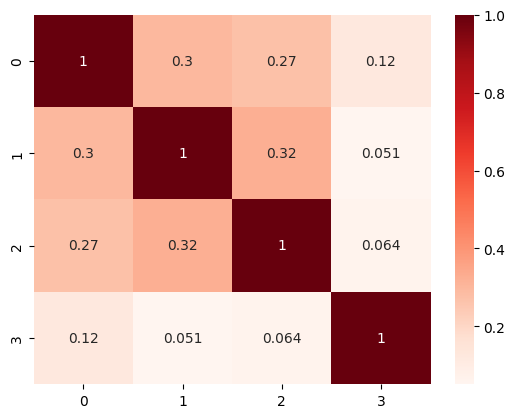

In [45]:
sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.show()

Признаков с высокой корреляцией не найдено

Выявляем наличие категориальных и числовых переменных, проверяем уникальные значения в качественных значениях

In [48]:
# Разделение переменных на категориальные и не категориальные
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(f'Категориальные переменные: {categorical_columns}')
print(f'Числовые переменные: {numerical_columns}')

Категориальные переменные: ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14', 'credit']
Числовые переменные: ['A3', 'A8', 'A11', 'A15']


In [47]:
for c in categorical_columns:
    print(c, data[c].unique())

A1 ['b' 'a' None]
A2 ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' None '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' 

Две колонки, которые изначально должны относится к числовым переменным (А2, А14) выводятся некорректно, принимаем решение удалить их из рассмотрения

In [70]:
del data['A2']
del data['A14']

In [72]:
categorical_columns.remove('A2')
categorical_columns.remove('A14')

In [73]:
for c in categorical_columns:
    print(c, data[c].unique())

A1 ['b' 'a' None]
A4 ['u' 'y' None 'l']
A5 ['g' 'p' None 'gg']
A6 ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' None]
A7 ['v' 'h' 'bb' 'ff' 'j' 'z' None 'o' 'dd' 'n']
A9 ['t' 'f']
A10 ['t' 'f']
A12 ['f' 't']
A13 ['g' 's' 'p']
credit ['+' '-']


Заканчиваем с первичной обработкой, далее выделяем y как целевую переменную и x как остальные параметры

In [76]:
# Выделение X и y
X = data.drop(('credit'), axis = 1)
y = np.asarray(data['credit'])
categorical_columns.remove('credit')

In [77]:
X

,A1,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15
0,b,0.000,u,g,w,v,1.25,t,t,1,f,g,0
1,a,4.460,u,g,q,h,3.04,t,t,6,f,g,560
2,a,0.500,u,g,q,h,1.50,t,f,0,f,g,824
3,b,1.540,u,g,w,v,3.75,t,t,5,t,g,3
4,b,5.625,u,g,w,v,1.71,t,f,0,f,s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,10.085,y,p,e,h,1.25,f,f,0,f,g,0
686,a,0.750,u,g,c,v,2.00,f,t,2,t,g,394
687,a,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1
688,b,0.205,u,g,aa,v,0.04,f,f,0,f,g,750


In [78]:
y

array(['+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+

Заменяем пропуски в Х на медианные значения

In [79]:
X = X.fillna(X.median(axis = 0), axis = 0)

data_describe = X.describe(include = [object])
for c in categorical_columns:
    X[c] = X[c].fillna(data_describe[c]['top'])

<ipython-input-79-5f9bca8b218d>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(X.median(axis = 0), axis = 0) #заменяем пропуски медианным значением


In [ ]:
Работаем с категориальными перемеными, для этого делим их на бинарные переменные (2 значения - в рассматриваемом случае t/f a/b) и небинарные (более 2 значений)

In [80]:
binary_columns = [c for c in categorical_columns if X[c].nunique() == 2]
nonbinary_columns = [c for c in categorical_columns if X[c].nunique() > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12'] ['A4', 'A5', 'A6', 'A7', 'A13']


Составляем таблицу определив для значений 0 или 1

In [95]:
X['A1'] = X['A1'].replace({'a': 1, 'b': 0})
X['A9'] = X['A9'].replace({'t': 1, 'f': 0})
X['A10'] = X['A10'].replace({'t': 1, 'f': 0})
X['A12'] = X['A12'].replace({'t': 1, 'f': 0})
X_binary = pd.DataFrame(X[binary_columns])

In [101]:
X_binary #проверяем корректность записи значений (должны быть только 0 и 1)

,A1,A9,A10,A12
0,0,1,1,0
1,1,1,1,0
2,1,1,0,0
3,0,1,1,1
4,0,1,0,0
...,...,...,...,...
685,0,0,0,0
686,1,0,1,1
687,1,0,1,1
688,0,0,0,0


Используем метод One-hot-encoding для небинарных категориальных переменных

In [97]:
from sklearn.preprocessing import OneHotEncoder

W = X[nonbinary_columns]
categories_list = []
for col in W.columns:
  categories_list.append(W[col].unique())

ohe = OneHotEncoder(categories=categories_list)
X_nonbinary = pd.DataFrame(ohe.fit_transform(W).toarray())

In [98]:
ohe

OneHotEncoder(categories=[array(['u', 'y', 'l'], dtype=object),
                          array(['g', 'p', 'gg'], dtype=object),
                          array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j'], dtype=object),
                          array(['v', 'h', 'bb', 'ff', 'j', 'z', 'o', 'dd', 'n'], dtype=object),
                          array(['g', 's', 'p'], dtype=object)])

In [100]:
X_nonbinary

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
686,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Далее стандартизируем числовые переменные из-за разной размерности

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X[numerical_columns])
X_numerical = pd.DataFrame(scaler.transform(X[numerical_columns]))

In [104]:
X_numerical

,0,1,2,3
0,-0.956613,-0.291083,-0.288101,-0.195413
1,-0.060051,0.244190,0.740830,-0.087852
2,-0.856102,-0.216324,-0.493887,-0.037144
3,-0.647038,0.456505,0.535044,-0.194837
4,0.174141,-0.153526,-0.493887,-0.195413
...,...,...,...,...
685,1.070704,-0.291083,-0.493887,-0.195413
686,-0.805846,-0.066806,-0.082314,-0.119736
687,1.757198,-0.066806,-0.288101,-0.195221
688,-0.915403,-0.652915,-0.493887,-0.051358


In [105]:
#Объединяем в одну таблицу
X_preprocess = pd.concat([X_numerical, X_binary, X_nonbinary],  axis = 1, ignore_index=True)

print(X_preprocess.shape)

(690, 40)


In [106]:
X_preprocess

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.956613,-0.291083,-0.288101,-0.195413,0,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.060051,0.244190,0.740830,-0.087852,1,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.856102,-0.216324,-0.493887,-0.037144,1,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.647038,0.456505,0.535044,-0.194837,0,1,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174141,-0.153526,-0.493887,-0.195413,0,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.070704,-0.291083,-0.493887,-0.195413,0,0,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
686,-0.805846,-0.066806,-0.082314,-0.119736,1,0,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
687,1.757198,-0.066806,-0.288101,-0.195221,1,0,1,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,-0.915403,-0.652915,-0.493887,-0.051358,0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Обучение модели

##KNN

Рассматриваем метод ближайших соседей, где гиперпараметр n_neighbors означает кол-во рассматриваемых ближайших соседей, по умолчанию равен 3

In [142]:
# Разделение на тестовую и тренировочную выборки
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X_preprocess, y, test_size=0.3, random_state=42)

In [143]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Получаем предсказания и расчитываем метрики качества accuracy, f1, precision, recall отражающие процент точности предсказаний обученной модели

In [144]:
y_pred = neigh.predict(X_test)

In [145]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [146]:
print(accuracy, f1, precision, recall)

0.8115942028985508 0.8107136565082265 0.8129518605861317 0.8115942028985508


In [147]:
# Классы в данных несбалансированы, поэтому наиболее показательной метриков будет f1
# Подбор параметра n_neighbors - количество соседей
n_neighbors_list = [3, 5, 10, 15, 20, 30, 50] #перебираем значения для n_neighbors

best_f1 = 0.0
best_n = 3
f1_list = []
for n in n_neighbors_list:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    if f1 > best_f1:
        best_n = n
        best_f1 = f1
    f1_list.append(f1)
    print(f1, n)

print(f'Best f1: {best_f1}, best n_neighbors: {best_n}')

0.8107136565082265 3
0.8010066645342894 5
0.8256203286042912 10
0.7850917745596191 15
0.8050291093769354 20
0.8194713610348834 30
0.8190829374938029 50
Best f1: 0.8256203286042912, best n_neighbors: 10


Визуализация зависимости зачения параметра и зачения метрики качества

Text(0.5, 1.0, 'F1')

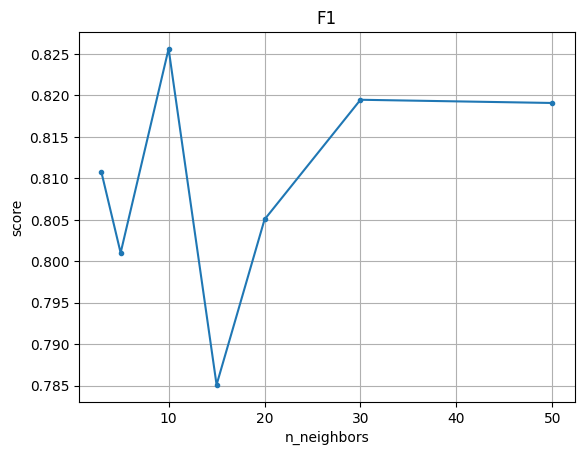

In [148]:

import pylab

pylab.plot(n_neighbors_list, f1_list, marker='.', label='KNN')
pylab.grid(True)
pylab.xlabel('n_neighbors')
pylab.ylabel('score')
pylab.title('F1')

### Подбор нескольких гиперпараметров

In [161]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

Обучаем модель на 2 гиперпараметрах, добавляем параметр расстояния р (по умолчанию равен 1)

In [162]:
from matplotlib.pylab import float128

n_neighbors_list = [3, 5, 10, 15, 20, 30, 50]
p_list = [1, 2]

best_f1 = 0.0
best_n, best_p = 3, 2
f1_list = []
for n in n_neighbors_list:
    for p in p_list:
        neigh = KNeighborsClassifier(n_neighbors = n, p = p)
        neigh.fit(X_train, y_train)
        y_pred = neigh.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='binary', pos_label= '+')
        if f1 > best_f1:
            best_n = n
            best_p = p
            best_f1 = f1
        f1_list.append(f1)

print(f'Best f1: {best_f1}, best n_neighbors: {best_n}, best p: {best_p}')

neigh = KNeighborsClassifier(n_neighbors = best_n, p = best_p)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary', pos_label= '+')

print(f'Test f1: {f1}')

Best f1: 0.9166666666666666, best n_neighbors: 3, best p: 1
Test f1: 0.8044692737430169


расчитываем и визуализируем Confusion matrix, где
tp - предсказана выдача карты, карта выдана
tn - предсказан отказ в выдаче, карта не выдана
fp - предсказана выдача, на самом деле отказ в выдаче
fn - предсказан отказ, на самом деле карта выдана

In [163]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 72,  25],
       [ 10, 100]])

In [164]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

72 25 10 100


Итого 172 правильных предсказаний, 35 ошибочных предсказаний

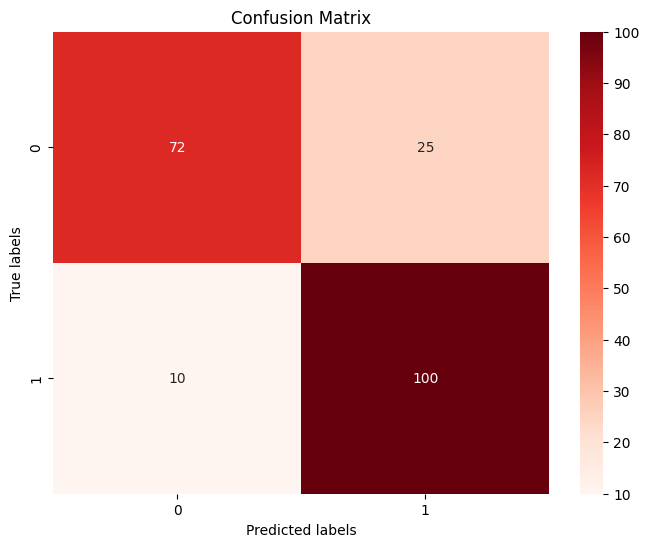

In [165]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix):  #визуализируем матрицу
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix)

## Модель SVC

Обучению методу SVC (метод опорных векторов)

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

Выполняем предсказание

In [168]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Расчитываем качество предсказания по метрикам качества

In [169]:

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [170]:
print(accuracy, f1, precision, recall)

0.8357487922705314 0.8355647573038877 0.8454488314745533 0.8357487922705314


In [171]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[88,  9],
       [25, 85]])

In [172]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

88 9 25 85


Получаем 173 правильных предсказаний

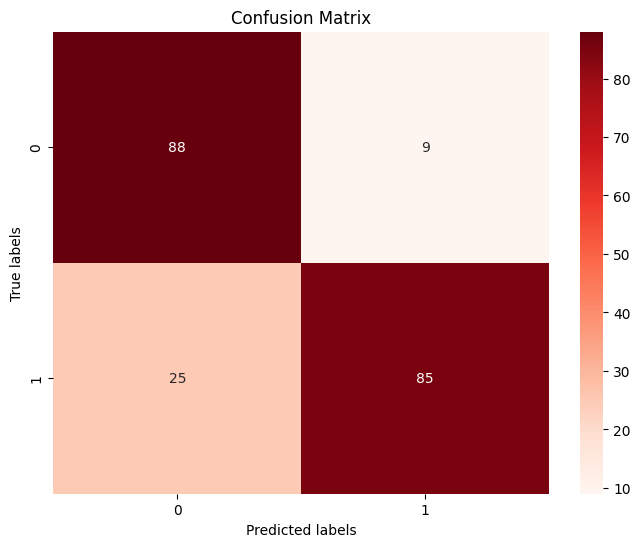

In [173]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix):  #визуализируем матрицу
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix)

# Кластеризация

K-means

Выявляем структуру в данных для объединения в кластеры

In [175]:
# Возьмем числовые признаки
X_for_clustering = data[['A11', 'A3']]

In [190]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(X_for_clustering)
label = kmeans.fit_predict(X_for_clustering)

Согласно вычислениям коэффициента силуента (метрика качества) наилучшая точность построения кластерной структуры при выделении 4 кластеров)

In [191]:
from sklearn.metrics import silhouette_score

preds = kmeans.fit_predict(X_for_clustering)
silhouette_score(X_for_clustering, preds)

0.5982886793275152

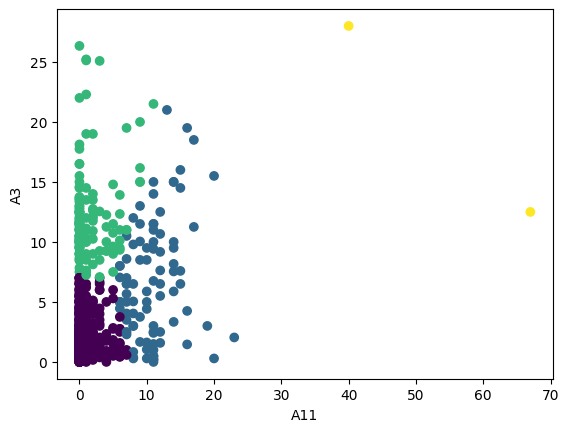

In [192]:
import pylab as plt
plt.scatter(X_for_clustering['A11'], X_for_clustering['A3'], c=kmeans.labels_)
plt.xlabel("A11")
plt.ylabel("A3")
plt.show()
# таким образом образовалось пять групп со схожими признаками, как видно из графика элементы каждой группы расположены в определённых пределах прироста капитала (значения по оси y)

Образовались 4 группы со схожими признаками, при этом виден шум (жёлтый кластер) - точки, расположенные далеко от остальных и друг от друга